In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

Target distribution: $\pi(x)=\frac{1}{2}N(-4,1)+\frac{1}{2}N(4,1)$

In [172]:
#defining densities function:
def normal_density(x,m,sigma2):
    return 1/(np.sqrt(2*np.pi*sigma2))*np.exp(-1/(2*sigma2)*(x-m)**2)
def target_density(x):
        i=bernoulli.rvs(1/2, loc=0, size=1, random_state=None)[0]
        if(i==0):
            return normal_density(x,-4,1)
        else:
            return normal_density(x,4,1)
def target_density_plot(x):
    out=[0]*len(x)
    for j in range(len(x)):
        i=bernoulli.rvs(1/2, loc=0, size=1, random_state=None)[0]
        if(i==0):
            out[j]=normal_density(x[j],-4,1)
        else:
            out[j]=normal_density(x[j],4,1)
    return out
#resampling function using numpy multinomial generator:
def resample(N,density, m, sigma,  target_density):
    samples=np.random.normal(m,np.sqrt(sigma), size=N)
    new_samp=[]
    weights=[target_density(samples[i])/density(samples[i], m, sigma) for i in range(N)]
    weights=weights/sum(weights)
    csi=np.random.multinomial(N,weights)
    for j in range(len(csi)):
        if(csi[j]==0):
            continue
        new_samp.extend([samples[j]]*csi[j])
       
    return new_samp
#resampling function implementing the sampling from multinomial distribution:
def resample2(N,density, m, sigma,  target_density):
    samples=np.random.normal(m,np.sqrt(sigma), size=N)
    new_samp=[]
    norm=np.sum(np.array([target_density(samples[i])/density(samples[i], m, sigma) for i in range(N)]))
    weights=[[i,(target_density(samples[i])/density(samples[i], m, sigma))/norm] for i in range(N)]
    weights.sort(key = lambda x: x[1])
    sums_weights=[sum([weights[i][1]for i in range(j)]) for j in range(1,N+1)]
    csi=[0]*N
    for i in range(1,N):
        u=np.random.uniform(0,1,1)
        if(sums_weights[i]>=u):
                csi[int(weights[i][0])]+=1
       
        
    for j in range(len(csi)):
        if(csi[j]==0):
            continue
        new_samp.extend([samples[j]]*csi[j])
    return new_samp

In [173]:
#generating samples:
N=10000
x_samples1=resample2(N,normal_density,0,1, target_density)
x_samples4=resample2(N,normal_density,0,4, target_density)

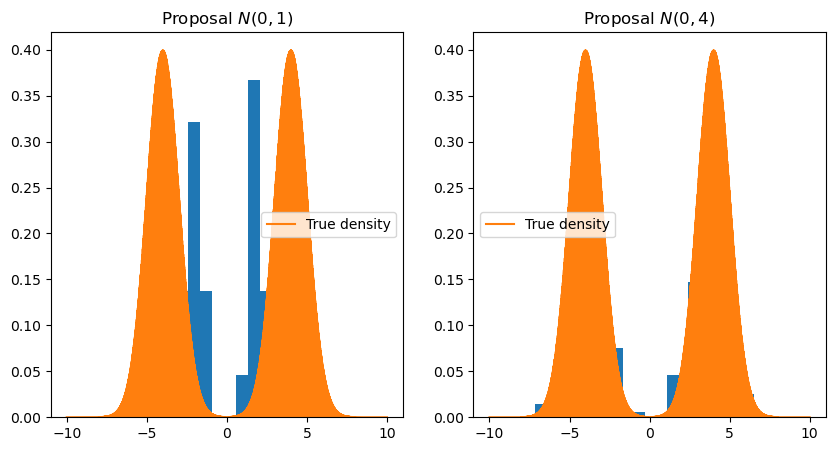

In [185]:
xx=np.linspace(-10,10,N)
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].hist(x_samples1, density=True);
axes[0].set_title("Proposal $N(0,1)$");
axes[0].plot(xx,target_density_plot(xx), label="True density")
axes[0].legend(loc='best')
axes[1].hist(x_samples4, density=True);
axes[1].plot(xx,target_density_plot(xx), label="True density")
axes[1].legend(loc='best')
axes[1].set_title("Proposal $N(0,4)$");


We see that by increasing the variance, since the spread of the distribution increases, we have more samples of X falling in the area with greater probability mass.